## Income Group Classification

## Context 
DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are given a task of coming up with a policy framework using a dataset that the Government received from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government. 

### Objective

1. What are the different factors that influence the income of an individual?

2. To build a prediction model that can help the government formulate policies for the right pockets of the society.

### Dataset

The data contains characteristics of the people

* age: continuous - age of a Person 
* workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
* education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: no. of years a person studied - continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

### Loading Libraries

In [121]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [122]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data cleaning steps and observations from EDA.

### Load data

In [123]:
who = pd.read_csv("who_data.csv")

<IPython.core.display.Javascript object>

In [124]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [125]:
data.head()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


<IPython.core.display.Javascript object>

In [126]:
data.tail()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,White,Female,15024,0,40,United-States,>50K


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [127]:
data.shape

(32561, 14)

<IPython.core.display.Javascript object>

* The dataset has 32561 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marital status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   race                    32561 non-null  object
 8   sex                     32561 non-null  object
 9   capital gain            32561 non-null  int64 
 10  capital loss            32561 non-null  int64 
 11  working hours per week  32561 non-null  int64 
 12  native-country          32561 non-null  object
 13  salary                  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


<IPython.core.display.Javascript object>

* We see that names of the columns have spaces, dots, and dash which we will remove as they should not be present in column names. We are doing this to maintain uniformity among the column names.
* Dependent variable is the salary which is of categorical type.
* age, capital gain, and capital loss are of integer type while other variables are of categorical type.
* There are no missing values in the dataset.

In [129]:
# fixing the names of columns as there are dots, spaces  in columns names
## Don't do this
# data.columns = [col.replace(" ", "_") for col in data.columns]
# data.columns = [col.replace("-", "_") for col in data.columns]
# data.columns = [col.replace(".", "") for col in data.columns]

# Do this instead
data.columns = [
    col.replace(" ", "_").replace("-", "_").replace(".", "") for col in data.columns
]

<IPython.core.display.Javascript object>

In [130]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'race', 'sex', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'native_country', 'salary'],
      dtype='object')


<IPython.core.display.Javascript object>

* The column names are fixed

### Summary of the dataset.

In [131]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


<IPython.core.display.Javascript object>

* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

**Lets us look at different levels in categorical variables**

In [132]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['workclass', 'education', 'marital_status', 'occupation', 'race', 'sex',
       'native_country', 'salary'],
      dtype='object')

<IPython.core.display.Javascript object>

In [13]:
for col in cat_columns:
    print(f"Unique values in | {col} | are :")
    print(data[col].value_counts())
    print("*" * 50)

Unique values in | workclass | are :
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
**************************************************
Unique values in | education | are :
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
**************************************************
Unique values in | marital_status | are :
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated     

<IPython.core.display.Javascript object>

* There are some values represented by a '?' in workclass, occupation, and native country columns which we should investigate further.
* There are many distinct values in native_country that can be reduced to their respective continents.
* The distinct levels of marital_status can also be reduced.
* Note the LEADING SPACE " " on every one of these values

#### We can assume that wherever there is a ? the data is unknown or missing. Let us see if there is a pattern in the missingness.

#### workclass

In [137]:
data[data["workclass"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
8954,65,?,325537,Assoc-voc,11,Married-civ-spouse,?,White,Male,0,0,50,United-States,>50K
10253,17,?,210547,10th,6,Never-married,?,White,Male,0,0,40,United-States,<=50K
13026,79,?,100881,Assoc-acdm,12,Married-civ-spouse,?,White,Female,0,0,2,United-States,>50K
20664,77,?,158847,Assoc-voc,11,Married-spouse-absent,?,White,Female,0,0,25,United-States,<=50K
8643,43,?,116632,Some-college,10,Married-civ-spouse,?,White,Male,0,0,45,United-States,>50K


<IPython.core.display.Javascript object>

* From the sample it looks like wherever workclass is missing occupation is also missing. 
* It looks like for ? observations in workclass the native country is the United States.
* Let's see if the above observations hold.

In [134]:
num_workclass_missing = data["workclass"].value_counts()[" ?"]
print(f"workclass unknown: {num_workclass_missing}")

data[data["workclass"] == " ?"]["occupation"].value_counts()

workclass unknown: 1836


 ?    1836
Name: occupation, dtype: int64

<IPython.core.display.Javascript object>

In [136]:
# Different way using `np.where()` and set notation
wmia = set(np.where(data["workclass"] == " ?")[0])
omia = set(np.where(data["occupation"] == " ?")[0])

len(wmia & omia)

1836

<IPython.core.display.Javascript object>

* It is indeed true that wherever workclass has ? the occupation is also ?
* This indicates there is a strong pattern in the missingness of workclass and occupation. This is intuitive as well because both the columns are capturing similar information.

In [138]:
data[data["workclass"] == " ?"]["native_country"].value_counts()

 United-States         1659
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 South                    9
 Germany                  9
 Taiwan                   9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England                  4
 Portugal                 3
 Columbia                 3
 Vietnam                  3
 Dominican-Republic       3
 Japan                    3
 Cuba                     3
 Haiti                    2
 France                   2
 Ecuador                  1
 Peru                     1
 Cambodia                 1
 Thailand                 1
 Honduras                 1
 Laos                     1
 Hong                     1
 Guatemala                1
 Trinadad&Tobago          1
 Iran                     1
 Nicaragua                1
 Jamaica                  1
 Scotland                 1
Name: native_country

<IPython.core.display.Javascript object>

* The above observations don't hold for native_country as there many other countries where the observations are ?.

#### occupation

In [139]:
data[data["occupation"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
8636,65,?,111916,HS-grad,9,Married-civ-spouse,?,White,Male,0,0,40,United-States,<=50K
20321,65,?,149131,Bachelors,13,Married-civ-spouse,?,White,Male,0,0,40,Italy,>50K
26137,20,?,25139,Some-college,10,Never-married,?,White,Female,0,0,40,United-States,<=50K
29297,18,?,252046,HS-grad,9,Never-married,?,White,Female,0,0,30,United-States,<=50K
28603,75,?,128224,5th-6th,3,Married-civ-spouse,?,White,Male,0,0,25,United-States,<=50K


<IPython.core.display.Javascript object>

In [140]:
data[data["occupation"] == " ?"]["workclass"].value_counts()

 ?               1836
 Never-worked       7
Name: workclass, dtype: int64

<IPython.core.display.Javascript object>

* We observe the same pattern here, where occupation is ? most of the values in workclass are ?.

In [141]:
data[data["occupation"] == " ?"]["native_country"].value_counts()

 United-States         1666
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 South                    9
 Germany                  9
 Taiwan                   9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England                  4
 Portugal                 3
 Columbia                 3
 Vietnam                  3
 Dominican-Republic       3
 Japan                    3
 Cuba                     3
 Haiti                    2
 France                   2
 Ecuador                  1
 Peru                     1
 Cambodia                 1
 Thailand                 1
 Honduras                 1
 Laos                     1
 Hong                     1
 Guatemala                1
 Trinadad&Tobago          1
 Iran                     1
 Nicaragua                1
 Jamaica                  1
 Scotland                 1
Name: native_country

<IPython.core.display.Javascript object>

* The native_country column has other countries where the observations are ? corresponding to ?s in occupation.

#### native_country

In [142]:
data[data["native_country"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
26271,37,Private,220644,HS-grad,9,Divorced,Other-service,Black,Female,0,0,40,?,<=50K
27383,32,Self-emp-not-inc,261056,Bachelors,13,Never-married,Prof-specialty,Black,Female,2174,0,60,?,<=50K
18277,90,Private,311184,Bachelors,13,Married-civ-spouse,Sales,White,Male,0,0,20,?,<=50K
12899,41,Private,529216,Bachelors,13,Divorced,Tech-support,Black,Male,7430,0,45,?,>50K
12748,55,Private,305759,HS-grad,9,Divorced,Other-service,White,Male,0,0,40,?,<=50K


<IPython.core.display.Javascript object>

In [143]:
data[data["native_country"] == " ?"]["occupation"].value_counts()

 Prof-specialty       102
 Other-service         83
 Exec-managerial       74
 Craft-repair          69
 Sales                 66
 Adm-clerical          49
 Machine-op-inspct     36
 ?                     27
 Transport-moving      25
 Handlers-cleaners     20
 Tech-support          16
 Priv-house-serv        6
 Farming-fishing        5
 Protective-serv        5
Name: occupation, dtype: int64

<IPython.core.display.Javascript object>

In [144]:
data[data["native_country"] == " ?"]["workclass"].value_counts()

 Private             410
 Self-emp-not-inc     42
 Self-emp-inc         42
 ?                    27
 Local-gov            26
 State-gov            19
 Federal-gov          17
Name: workclass, dtype: int64

<IPython.core.display.Javascript object>

In [145]:
### We should have done this to avoid leading spaces throughout

# for col in cat_cols:
#     df[col] = df[col].str.strip()

<IPython.core.display.Javascript object>

* There is no clear pattern here.

#### Observations:
* We observe that all the observations where `workclass` = ? the values in the `occupation` are ? 
* The strong pattern between `workclass` and `occupation` makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in `occupation` and `workclass` with `native_country`.
* For now we will replace these ?'s with the 'unknown' category.

#### Replacing ? with 'Unknown'

In [24]:
## This is silly, don't do this

# data['workclass'] = data['workclass'].apply(lambda x: "Unknown" if x == " ?" else x)
# data['native_country'] = data['native_country'].apply(lambda x: "Unknown" if x == " ?" else x)
# data['occupation'] = data['occupation'].apply(lambda x: "Unknown" if x == " ?" else x)

## Do this instead

for col in ["workclass", "native_country", "occupation"]:
    data[col] = data[col].replace(" ?", "Unknown")

<IPython.core.display.Javascript object>

#### Mapping countries to continents to reduce the number of unique values.

In [146]:
data["native_country"].nunique()

42

<IPython.core.display.Javascript object>

* There are 42 distinct countries in the data set, we can reduce them to their respective continents as this will help us reduce the dimension of data.

In [147]:
data["native_country"] = data["native_country"].str.replace(
    " ", ""
)  # remove empty spaces from strings

<IPython.core.display.Javascript object>

In [27]:
north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States",
]
asia = [
    "Cambodia",
    "China",
    "Hong",
    "India",
    "Iran",
    "Japan",
    "Laos",
    "Philippines",
    "Taiwan",
    "Thailand",
    "Vietnam",
]
south_america = ["Columbia", "Ecuador", "Peru"]

europe = [
    "England",
    "France",
    "Germany",
    "Greece",
    "Holand-Netherlands",
    "Hungary",
    "Ireland",
    "Italy",
    "Poland",
    "Portugal",
    "Scotland",
    "Yugoslavia",
]
other = ["South", "Unknown"]

<IPython.core.display.Javascript object>

In [28]:
def region_combining(country):
    if country in north_america:
        return "north_america"
    elif country in asia:
        return "asia"
    elif country in south_america:
        return "south_america"
    elif country in europe:
        return "europe"
    elif country in other:
        return "other"
    else:
        return country

<IPython.core.display.Javascript object>

In [148]:
# Shouldn't this be called "continent"?
data["native_country"] = data["native_country"].apply(region_combining)

# data["continent"] = data["native_country"].apply(region_combining)
# data = data.drop('native_country', axis=1)


<IPython.core.display.Javascript object>

In [149]:
print("Distinct values in Native Country column:\n", data['native_country'].unique())

Distinct values in Native Country column:
 ['north_america' 'asia' '?' 'other' 'europe' 'south_america']


<IPython.core.display.Javascript object>

#### Reducing the number of distinct values in marital_status

In [150]:
data["marital_status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

<IPython.core.display.Javascript object>

We can reduce these values into the following groups:
* Married
* Not-Married
* Never-Married

In [151]:
data["marital_status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

<IPython.core.display.Javascript object>

In [152]:
data["marital_status"] = data["marital_status"].str.replace(
    " ", ""
)  # remove empty spaces from strings

<IPython.core.display.Javascript object>

In [153]:
### Kaspar's way
married_mapper = {
    "Never-married": "never_married",
    "Married-civ-spouse": "married",
    "Married-AF-spouse": "married",
    "Divorced": "not_married",
    "Separated": "not_married",
    "Widowed": "not_married",
    "Married-spouse-absent": "not_married",
}

data["marital_status"] = data["marital_status"].map(married_mapper)

<IPython.core.display.Javascript object>

In [35]:
## Another way, which do you think is more readable / maintainable?

married = ["Married-civ-spouse", "Married-AF-spouse"]
not_married = ["Divorced", "Separated", "Widowed", "Married-spouse-absent"]


def reduce_marital_status(x):
    if x in married:
        return "married"
    elif x in not_married:
        return "not_married"
    else:
        return x


# data["marital_status"] = data["marital_status"].apply(reduce_marital_status)

<IPython.core.display.Javascript object>

In [154]:
data["marital_status"].value_counts()

married          14999
never_married    10683
not_married       6879
Name: marital_status, dtype: int64

<IPython.core.display.Javascript object>

* Values have been clubbed into three categories.

## Univariate Analysis

In [155]:
def histogram_boxplot(
    data, feature, figsize=(12, 7), kde=False, bins=None, log_scale=None
):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    if log_scale is True:
        ax_box2.set_xscale("log")
        ax_hist2.set_xscale("log")

<IPython.core.display.Javascript object>

### Observations on fnlwgt

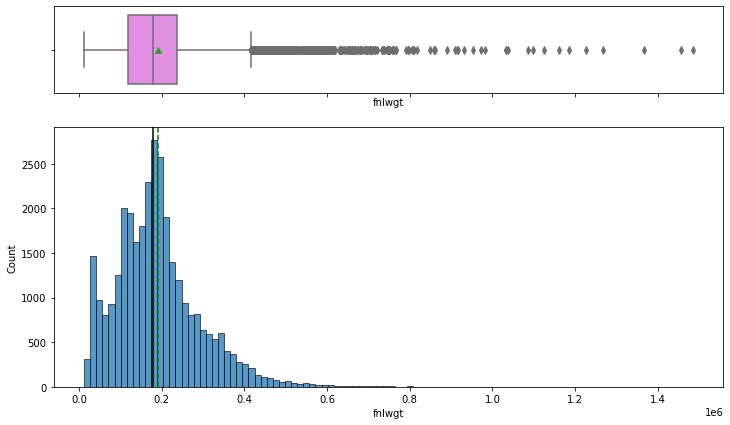

<IPython.core.display.Javascript object>

In [156]:
histogram_boxplot(data, "fnlwgt", bins=100)

* fnlwght is right-skewed. It has lots of outliers on the right side which we can cap.

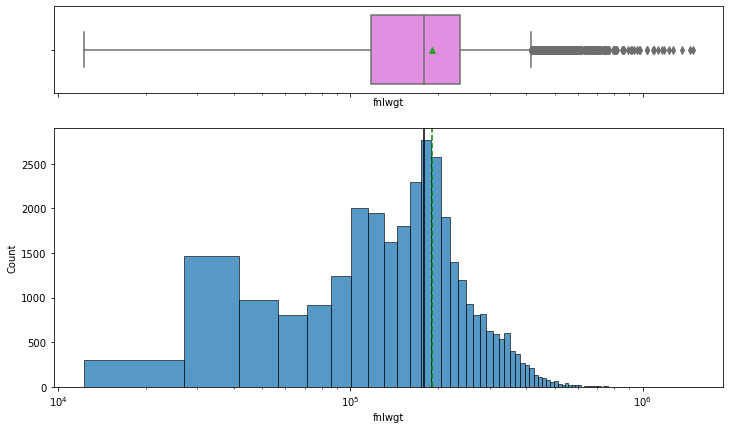

<IPython.core.display.Javascript object>

In [157]:
## Kaspar's edits: Does it get any better w/ a log scale?
histogram_boxplot(data, "fnlwgt", bins=100, log_scale=True)

### Observations on hours_per_week

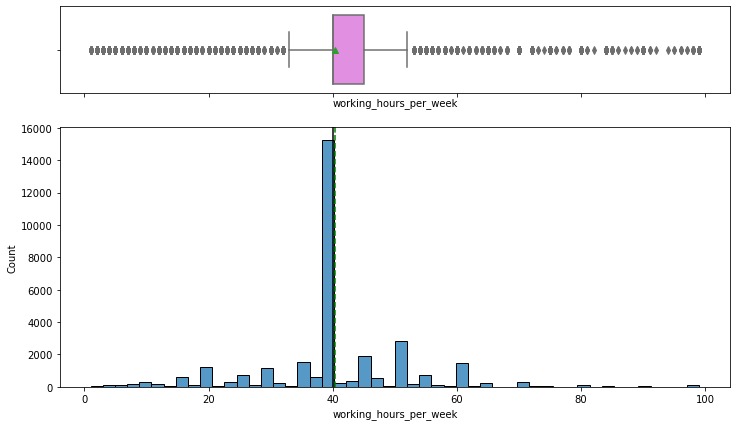

<IPython.core.display.Javascript object>

In [158]:
histogram_boxplot(data, "working_hours_per_week", bins=50)

* Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week.
* Some of the observations are clear outliers like working  1 hour a week which needs to be treated.

In [159]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on workclass

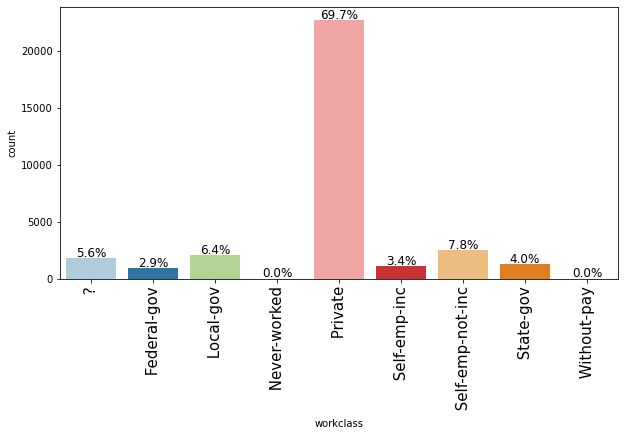

<IPython.core.display.Javascript object>

In [160]:
labeled_barplot(data, "workclass", perc=True)

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.

### Observations on marital_status

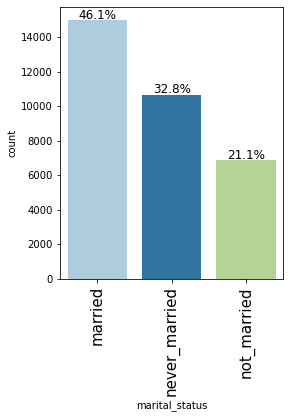

<IPython.core.display.Javascript object>

In [161]:
labeled_barplot(data, "marital_status", perc=True)

* 46.1% of the observations in the dataset are married followed by 32.8% of the people who never married.

### Observations on native_country

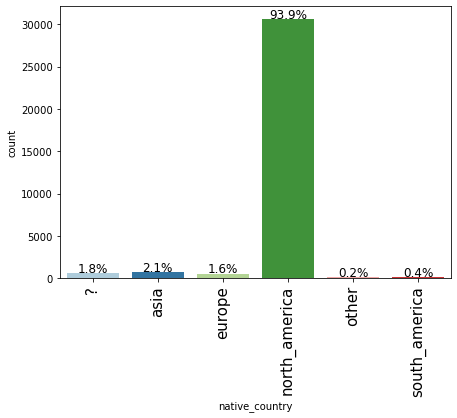

<IPython.core.display.Javascript object>

In [162]:
labeled_barplot(data, "native_country", perc=True)

* 94% of the people are native to north_america followed by 2.1% Asians.

### Observations on salary

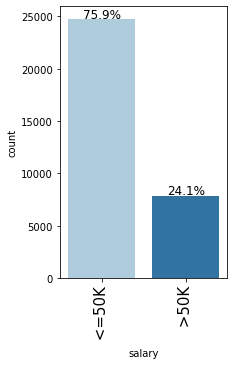

<IPython.core.display.Javascript object>

In [163]:
labeled_barplot(data, "salary", perc=True)

* ~24% of the observations have a salary above 50K and while ~76% have a salary below 50K

## Bivariate analysis

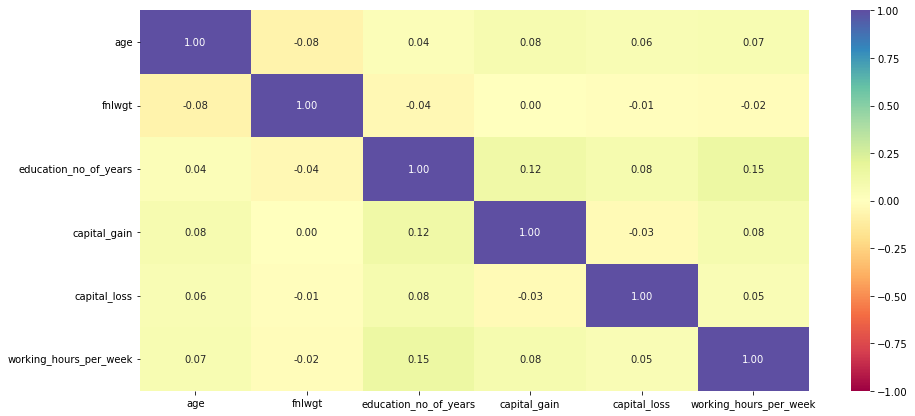

<IPython.core.display.Javascript object>

In [164]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

In [168]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, data["salary"], margins=True).sort_values(
        by=" >50K", ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, data["salary"], normalize="index").sort_values(
        by=" >50K", ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [169]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

salary    <=50K   >50K    All
sex                          
All       24720   7841  32561
 Male     15128   6662  21790
 Female    9592   1179  10771
------------------------------------------------------------------------------------------------------------------------


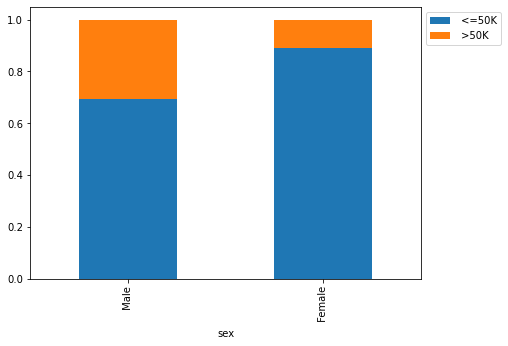

<IPython.core.display.Javascript object>

In [167]:
stacked_barplot(data, "sex", "salary")

* ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

### salary vs education

salary          <=50K   >50K    All
education                          
All             24720   7841  32561
 Bachelors       3134   2221   5355
 HS-grad         8826   1675  10501
 Some-college    5904   1387   7291
 Masters          764    959   1723
 Prof-school      153    423    576
 Assoc-voc       1021    361   1382
 Doctorate        107    306    413
 Assoc-acdm       802    265   1067
 10th             871     62    933
 11th            1115     60   1175
 7th-8th          606     40    646
 12th             400     33    433
 9th              487     27    514
 5th-6th          317     16    333
 1st-4th          162      6    168
 Preschool         51      0     51
------------------------------------------------------------------------------------------------------------------------


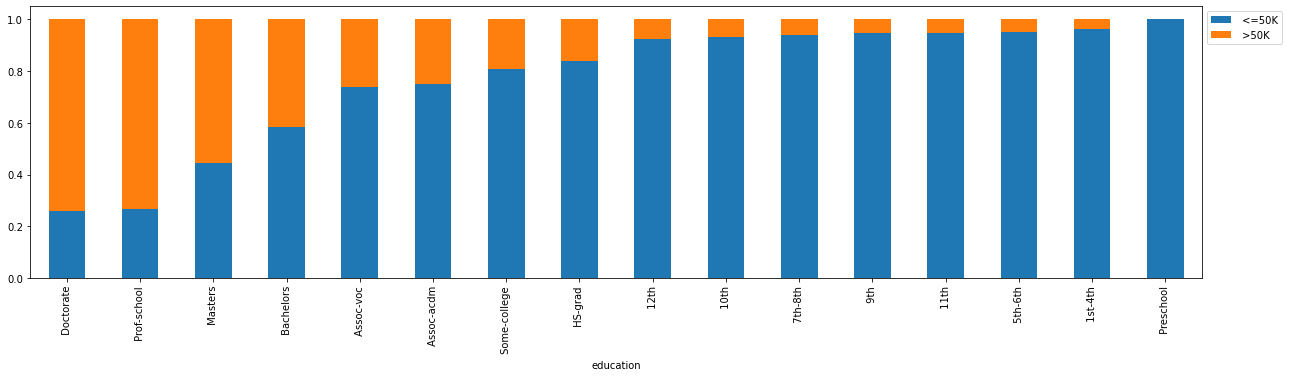

<IPython.core.display.Javascript object>

In [170]:
stacked_barplot(data, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

### salary vs occupation

salary               <=50K   >50K    All
occupation                              
All                  24720   7841  32561
 Exec-managerial      2098   1968   4066
 Prof-specialty       2281   1859   4140
 Sales                2667    983   3650
 Craft-repair         3170    929   4099
 Adm-clerical         3263    507   3770
 Transport-moving     1277    320   1597
 Tech-support          645    283    928
 Machine-op-inspct    1752    250   2002
 Protective-serv       438    211    649
 ?                    1652    191   1843
 Other-service        3158    137   3295
 Farming-fishing       879    115    994
 Handlers-cleaners    1284     86   1370
 Armed-Forces            8      1      9
 Priv-house-serv       148      1    149
------------------------------------------------------------------------------------------------------------------------


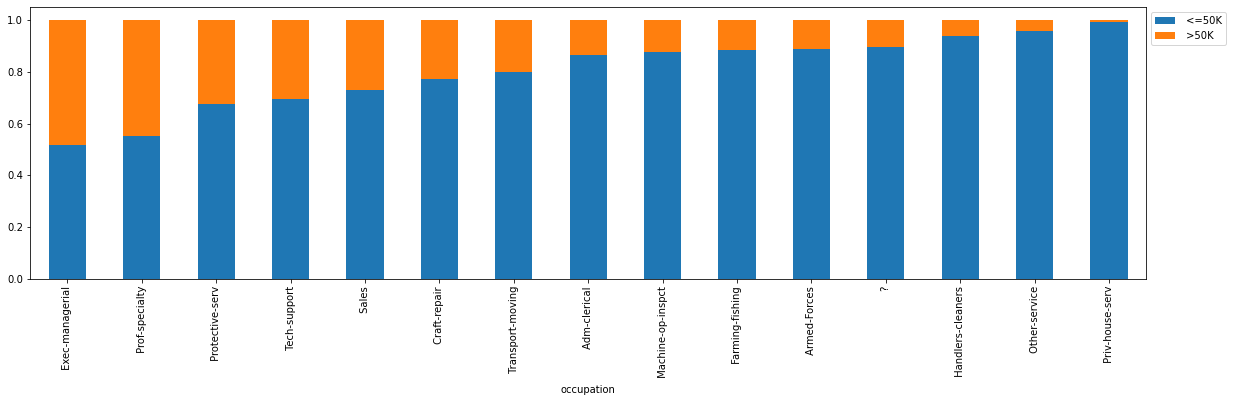

<IPython.core.display.Javascript object>

In [172]:
stacked_barplot(data, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

### salary vs race

salary                <=50K   >50K    All
race                                     
All                   24720   7841  32561
 White                20699   7117  27816
 Black                 2737    387   3124
 Asian-Pac-Islander     763    276   1039
 Amer-Indian-Eskimo     275     36    311
 Other                  246     25    271
------------------------------------------------------------------------------------------------------------------------


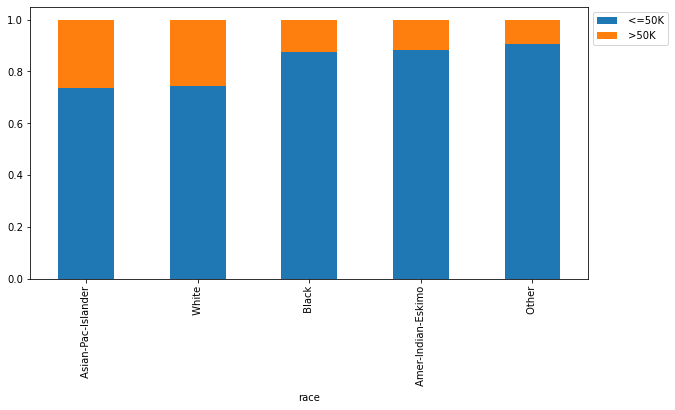

<IPython.core.display.Javascript object>

In [173]:
stacked_barplot(data, "race", "salary")

* 25% of the White and Asia-Pacific people have a salary more than 50K salary as compared to people from other race.

### salary vs workclass

salary              <=50K   >50K    All
workclass                              
All                 24720   7841  32561
 Private            17733   4963  22696
 Self-emp-not-inc    1817    724   2541
 Self-emp-inc         494    622   1116
 Local-gov           1476    617   2093
 Federal-gov          589    371    960
 State-gov            945    353   1298
 ?                   1645    191   1836
 Never-worked           7      0      7
 Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


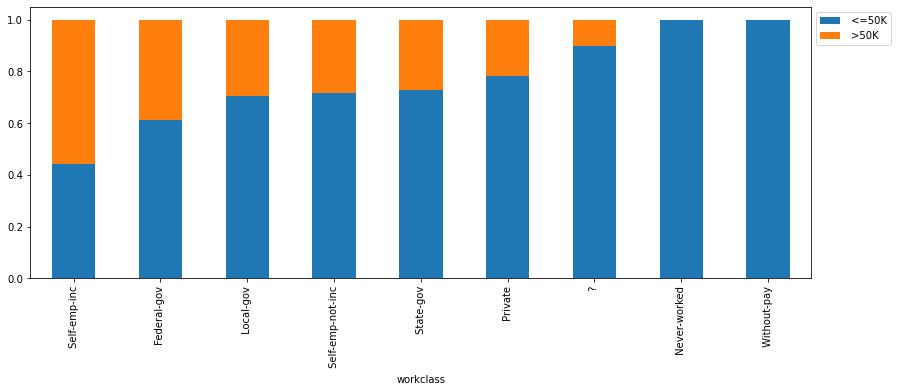

<IPython.core.display.Javascript object>

In [174]:
stacked_barplot(data, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

### salary vs marital_status

salary           <=50K   >50K    All
marital_status                      
All              24720   7841  32561
married           8297   6702  14999
not_married       6231    648   6879
never_married    10192    491  10683
------------------------------------------------------------------------------------------------------------------------


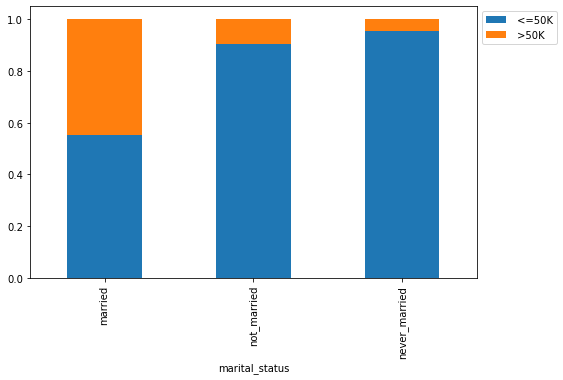

<IPython.core.display.Javascript object>

In [175]:
stacked_barplot(data, "marital_status", "salary")

* Married people have a higher likelihood of getting a salary above 50K compared to Never Married and Not married people.

In [176]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### salary vs age

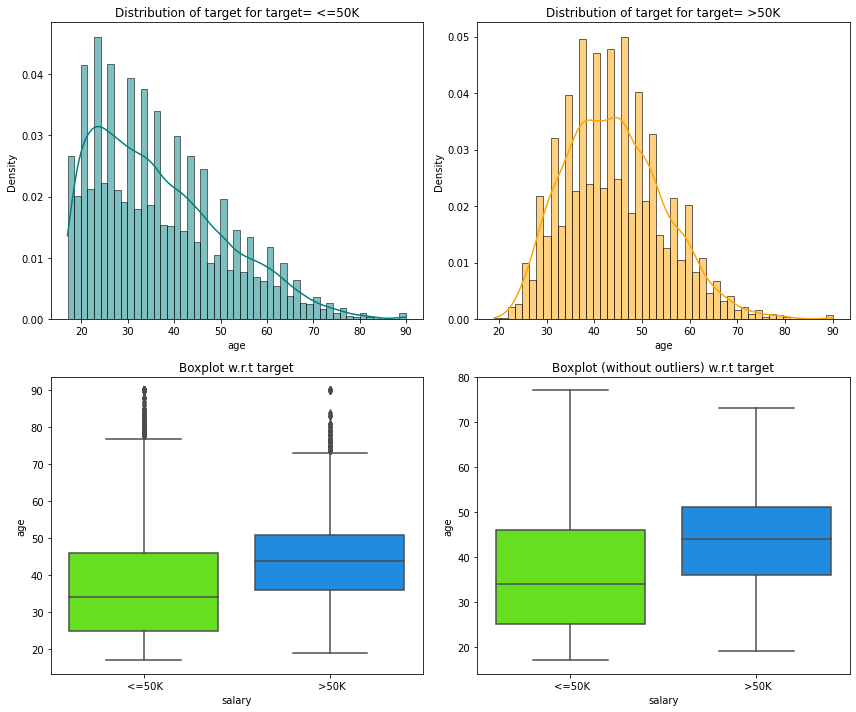

<IPython.core.display.Javascript object>

In [177]:
distribution_plot_wrt_target(data, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

### salary vs working_hours_per_week

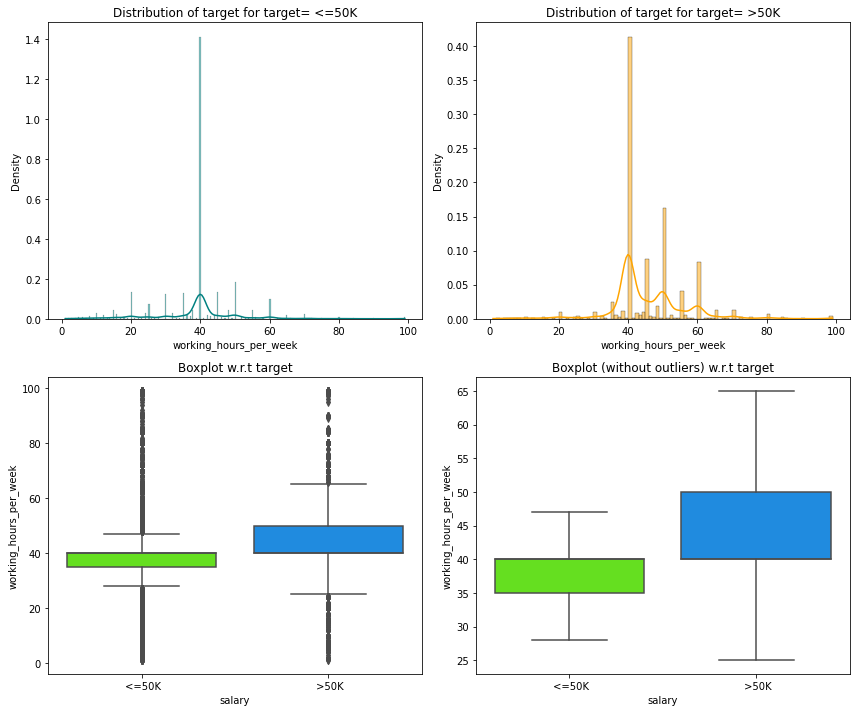

<IPython.core.display.Javascript object>

In [178]:
distribution_plot_wrt_target(data, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

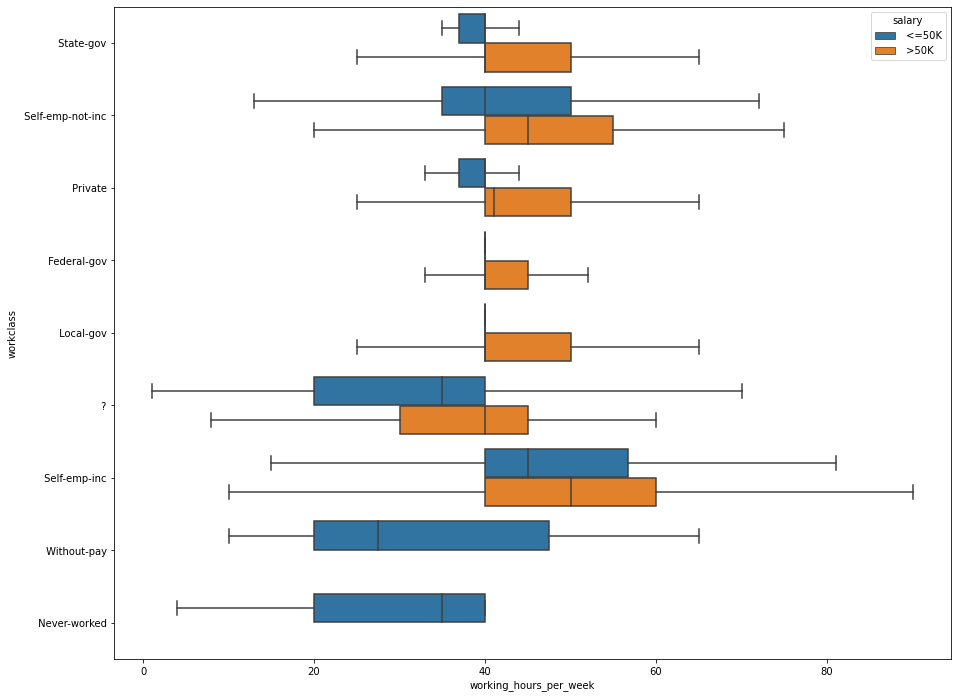

<IPython.core.display.Javascript object>

In [179]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="workclass", x="working_hours_per_week", data=data, hue="salary", showfliers=False
)
plt.show()

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* Dependent variable is the salary which is of categorical data type.
* age, capital gain, and capital loss are of integer type while other variables are of categorical type
* There are no missing values in the dataset.

**Data Cleaning:**

* We observed that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in occupation and workclass with native_country.
* For now we will replaced these ?'s with the 'unknown' category.
* There are 42 distinct countries in the data set, which were reduced to their respective continents to reduce the dimension of data and we now have only 5 distinct values in the data.
* We reduced the distinct groups of marital_status to three categories: Married, Not-Married and Never-Married.

**Observations from EDA:**

* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `fnlwght`: fnlwght is right-skewed. It has lots of outliers on the right side which we can cap.
* `working_hours_per_week`: Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week. Some of the observations are clear outliers like working  1 hour a week which needs to be treated.
* `workclass`: ~70% of the observations are from the Private sector working class.
* `marita_status`: 47.3% of the observations in the dataset are married followed by 32.8% of the people who never married.
* `race`: * 94% of the people are native to north_america followed by 2.1% Asians.
* `salary vs sex`: ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.
* `salary vs occupation`: - ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above 50,000 dollars. People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.
* `salary vs education`: ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above 50K dollars
* `salary vs workclass`: ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K. ~20% of the people working in the private sector earn more than 50K.
* `salary vs working_hours_per_week`: Majority of people having above 50K salary work around 40 hours per week.
* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.

### Actions for data pre-processing:

* Many variables have outliers that need to be treated.
* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.

### Data Pre-Processing

* Dropping capital_gain and capital_loss
* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Dropping capital_gain and capital_loss**

In [180]:
data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

**Outliers detection using boxplot**

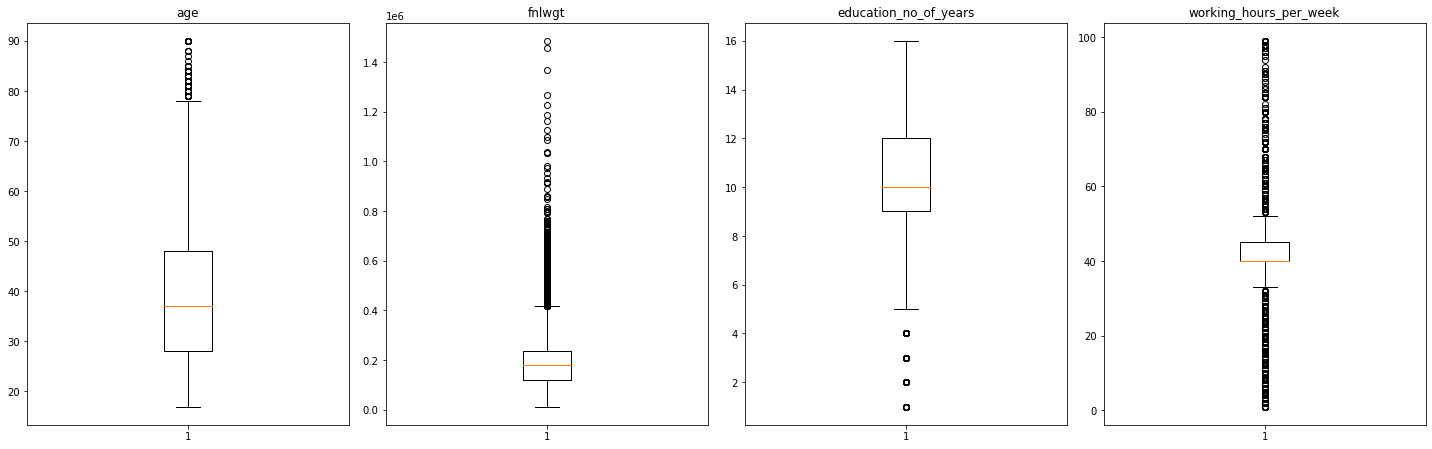

<IPython.core.display.Javascript object>

In [181]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Age and fnlwgt have upper outliers. 
* education_no_years has lower outliers. 
* working_hours_per_week has both upper and lower outliers.

### Treating Outliers

In [183]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [184]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

<IPython.core.display.Javascript object>

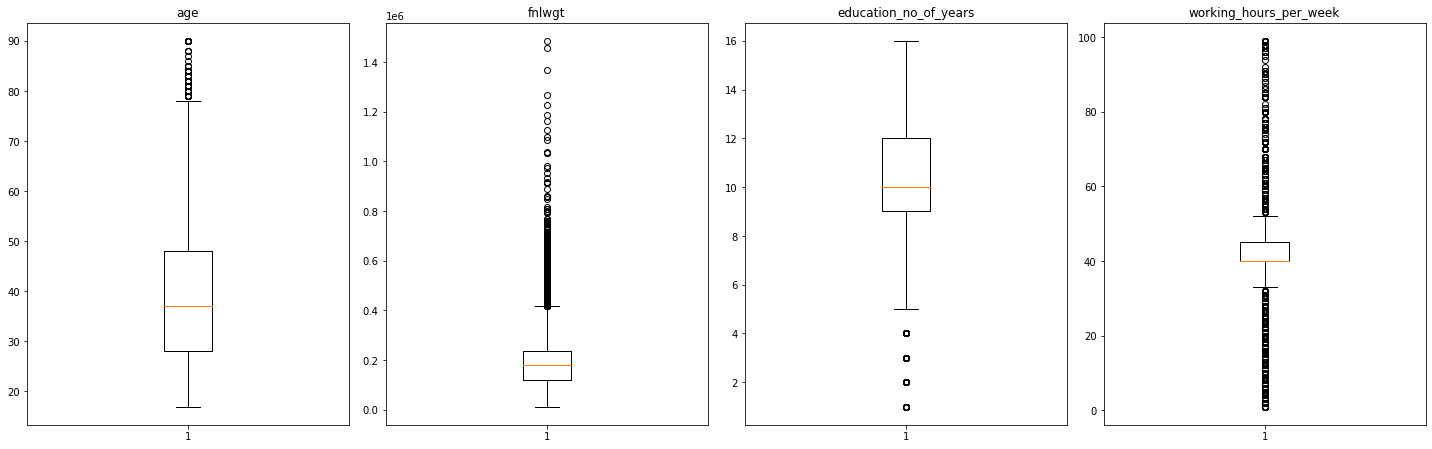

<IPython.core.display.Javascript object>

In [243]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation

**Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.**

In [185]:
# data["salary"] = data["salary"].apply(lambda x: 1 if x == " <=50K" else 0)
data["salary"] = data["salary"].map({" <=50K": 1, " >50K": 0})

<IPython.core.display.Javascript object>

**Creating training and test sets.**

In [186]:
X = data.drop(["salary"], axis=1)
Y = data["salary"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [187]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (22792, 53)
Shape of test set :  (9769, 53)
Percentage of classes in training set:
1    0.753335
0    0.246665
Name: salary, dtype: float64
Percentage of classes in test set:
1    0.772853
0    0.227147
Name: salary, dtype: float64


<IPython.core.display.Javascript object>

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person has a salary <=50K but in reality the salary of the person is >50K.
2. Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

### Which case is more important? 
* Both the cases are important as:

* If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.

* If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.


### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [189]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [313]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with Sklearn library)

In [191]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [194]:
# predicting on training set
y_pred_train = lg.predict(X_train)

<IPython.core.display.Javascript object>

In [195]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.8334503334503335
Precision: 0.865170380078637
Recall: 0.9227140361094933
F1: 0.893016177216617


<IPython.core.display.Javascript object>

#### Checking performance on test set

In [72]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

<IPython.core.display.Javascript object>

In [73]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.8380591667519706
Precision: 0.8782002534854246
Recall: 0.917748344370861
F1: 0.897538860103627


<IPython.core.display.Javascript object>

In [ ]:
# raise = gov't saving money ()
prec = tp / (tp + fp)
Precision = "Avoid False Positives"
Precision = "Do NOT gives the benefit to anyone who really shouldn't have gotten it"



# thumbs up = ensuring every qualified person actually gets benefit
Recall = tp / (tp + fn)
Recall = "Find all the ppl who really should get the benefit"

**Observations**

- The training and testing f1_scores are 0.89.

- f1_score on the train and test sets are comparable.

- This shows that the model is showing generalised results.

- We have build a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

### Logistic Regression (with statsmodels library)

In [197]:
X = data.drop(["salary"], axis=1)
Y = data["salary"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [198]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22740
Method:                           MLE   Df Model:                           51
Date:                Sun, 31 Oct 2021   Pseudo R-squ.:                  0.3631
Time:                        19:41:34   Log-Likelihood:                -8109.1
converged:                      False   LL-Null:                       -12733.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.6710        nan        nan        nan         nan         nan
age                              -0.0296      0.002    -16.234      0.000 

<IPython.core.display.Javascript object>

In [199]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.833406,0.922481,0.865283,0.892967


<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of customer being a defaulter decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer being a defaulter increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

### Multicollinearity

In [206]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                             0.000000
age                               1.543411
fnlwgt                            1.037764
education_no_of_years                  inf
working_hours_per_week            1.230861
workclass_ Federal-gov                 inf
workclass_ Local-gov                   inf
workclass_ Never-worked           1.005533
workclass_ Private                     inf
workclass_ Self-emp-inc                inf
workclass_ Self-emp-not-inc            inf
workclass_ State-gov                   inf
workclass_ Without-pay                 inf
education_ 11th                        inf
education_ 12th                        inf
education_ 1st-4th                     inf
education_ 5th-6th                     inf
education_ 7th-8th                     inf
education_ 9th                         inf
education_ Assoc-acdm                  inf
education_ Assoc-voc                   inf
education_ Bachelors                   inf
education_ Doctorat

<IPython.core.display.Javascript object>

* As we saw in our earlier analysis that wherever workclass has ? or unknown values occupation is also ? or unknown.
* The high correlation between these variables has been highlighted in the VIF values as well.
* We will drop occupation_Unknown as we get the same information from workclass_Unknown.
* education_no_of_years, education, and some categorical levels of Occupation, Workclass, relationship, native_country, and race also exhibit high multicollinearity.

#### Removing occupation_Unknown

In [208]:
X_train1.columns

Index(['const', 'age', 'fnlwgt', 'education_no_of_years',
       'working_hours_per_week', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'workclass_Unknown',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital_status_never_married',
       'marital_status_not_married', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
 

<IPython.core.display.Javascript object>

In [209]:
# X_train1 = X_train.drop("occupation_Unknown", axis=1)

# vif_series2 = pd.Series(
#     [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
#     index=X_train1.columns,
# )
# print("Series before feature selection: \n\n{}\n".format(vif_series2))

<IPython.core.display.Javascript object>

* Removal of occupation_Unknown has fixed multicollinearity in workclass column.
* education_no_of_years and education also capture similar information and hence it is understandable that they have high VIF values.
* Now dropping education_no_of_years, and education to see which variable has a significant impact on the model's performance.

#### Dropping education_no_of_years

In [210]:
X_train2 = X_train1.drop("education_no_of_years", axis=1)

vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                            341.657478
age                                1.543408
fnlwgt                             1.037670
working_hours_per_week             1.230480
workclass_ Local-gov               3.157727
workclass_ Never-worked            1.010896
workclass_ Private                 7.932842
workclass_ Self-emp-inc            2.238230
workclass_ Self-emp-not-inc        3.614046
workclass_ State-gov               2.343798
workclass_ Without-pay             1.017431
workclass_Unknown                  3.105519
education_ 11th                    2.207699
education_ 12th                    1.423685
education_ 1st-4th                 1.178784
education_ 5th-6th                 1.346636
education_ 7th-8th                 1.662528
education_ 9th                     1.548277
education_ Assoc-acdm              2.134350
education_ Assoc-voc               2.456743
education_ Bachelors               6.123671
education_ Doctorate               1.5849

<IPython.core.display.Javascript object>

* Dropping education_no_of_years fixes the multicollinearity in education column.

In [211]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

         Current function value: 0.355823
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.83345,0.922365,0.86541,0.89298


<IPython.core.display.Javascript object>

* No significant change in the model performance.

#### Dropping education

In [212]:
X_train3 = X_train1.drop(
    [
        "education_ 11th",
        "education_ 12th",
        "education_ 1st-4th",
        "education_ 5th-6th",
        "education_ 7th-8th",
        "education_ 9th",
        "education_ Assoc-acdm",
        "education_ Assoc-voc",
        "education_ Bachelors",
        "education_ Doctorate",
        "education_ HS-grad",
        "education_ Masters",
        "education_ Preschool",
        "education_ Prof-school",
        "education_ Some-college",
    ],
    axis=1,
)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

const                            328.635194
age                                1.489234
fnlwgt                             1.033255
education_no_of_years              1.533282
working_hours_per_week             1.223754
workclass_ Local-gov               3.147016
workclass_ Never-worked            1.009753
workclass_ Private                 7.925086
workclass_ Self-emp-inc            2.229977
workclass_ Self-emp-not-inc        3.602889
workclass_ State-gov               2.333573
workclass_ Without-pay             1.016985
workclass_Unknown                  3.090059
marital_status_never_married       1.752612
marital_status_not_married         1.430512
occupation_ Armed-Forces           1.011604
occupation_ Craft-repair           2.178469
occupation_ Exec-managerial        2.051804
occupation_ Farming-fishing        1.381175
occupation_ Handlers-cleaners      1.436503
occupation_ Machine-op-inspct      1.576180
occupation_ Other-service          1.7859

<IPython.core.display.Javascript object>

In [214]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train3, y_train)

         Current function value: 0.356502
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.832792,0.921549,0.865259,0.892518


<IPython.core.display.Javascript object>

* No significant change in the model performance.

**Observations:**
1. Dropping education_no_of_years and education doesn't have a significant impact on the model performance.
2. We can choose any model to proceed to the next steps.
3. Here, we will go with the lg2 model - where we dropped education_no_of_years as the education column captures more specific information.
4. Some of the categorical levels of a variable have VIF>5 which can simply be ignored.

#### Summary of the model without education_no_of_years

In [215]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22741
Method:                           MLE   Df Model:                           50
Date:                Sun, 31 Oct 2021   Pseudo R-squ.:                  0.3631
Time:                        19:49:59   Log-Likelihood:                -8109.9
converged:                      False   LL-Null:                       -12733.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             6.0889      0.402     15.161      0.000       5.302       6.876
age                              -0.0296      0.002    -16.233      0.000 

<IPython.core.display.Javascript object>

* In the case of 'race' all the attributes have a high p-value which means it is not significant therefore we can drop the complete variable.
* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

**Dropping Race**

In [216]:
X_train4 = X_train2.drop(
    ["race_ Asian-Pac-Islander", "race_ Black", "race_ Other", "race_ White"], axis=1
)

logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit()

print(lg4.summary())

         Current function value: 0.355988
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22745
Method:                           MLE   Df Model:                           46
Date:                Sun, 31 Oct 2021   Pseudo R-squ.:                  0.3628
Time:                        19:50:37   Log-Likelihood:                -8113.7
converged:                      False   LL-Null:                       -12733.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             5.7129      0.301     18.972      0.000       5.123       6.303
age     

<IPython.core.display.Javascript object>

In [217]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train4.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train4[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'age', 'fnlwgt', 'working_hours_per_week', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_Unknown', 'education_ 12th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Prof-school', 'education_ Some-college', 'marital_status_never_married', 'marital_status_not_married', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'native_country_europe', 'native_country_north_america', 'native_country_south_america']


<IPython.core.display.Javascript object>

In [218]:
X_train5 = X_train4[selected_features]

<IPython.core.display.Javascript object>

In [219]:
logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit(disp=False)

print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22759
Method:                           MLE   Df Model:                           32
Date:                Sun, 31 Oct 2021   Pseudo R-squ.:                  0.3617
Time:                        19:52:01   Log-Likelihood:                -8127.6
converged:                       True   LL-Null:                       -12733.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             6.0012      0.240     25.030      0.000       5.531       6.471
age                              -0.0296      0.002    -16.393      0.000 

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train5* as the final ones and *lg5* as final model.**

### Coefficient interpretations

* Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary. 

* Coefficient of age,fnlwgt,marital_status, working_hours_per_week,some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [221]:
# converting coefficients to odds
odds = np.exp(lg5.params)

# finding the percentage change
perc_change_odds = (np.exp(lg5.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train5.columns)

,Odds,Change_odd%
const,403.905742,40290.574233
age,0.970816,-2.918407
fnlwgt,0.999999,-0.000087
working_hours_per_week,0.933132,-6.686808
workclass_ Local-gov,1.906395,90.639546
workclass_ Private,1.470755,47.075489
workclass_ Self-emp-not-inc,2.279060,127.906015
workclass_ State-gov,1.849613,84.961261
workclass_Unknown,3.429522,242.952153
education_ 12th,0.475635,-52.436468


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person having salary <=50k by 0.97 times or a 2.90% decrease in odds of having salary <=50K.
* `working_hours_per_week`: Holding all other features constant a 1 unit change in the working_hours_per_week will decrease the odds of a person having salary <=50k by 0.93 times or a decrease of 6.6% decrease in odds of having salary <=50K.
* The odds of a person whose marital status is married having a salary <=50K is 0.075 less than the person who was never married or 92.2% fewer odds of having salary <=50K. Similarly, The odds of a person whose marital status is not_married having a salary <=50K is 0.65 times less than the person who was never married or 34.04% less odds of having a salary <=50K than the person who was never married. [keeping Never_married category as a reference].
* The odds of a person having salary <=50K is 0.47 times less than the person who has done education 1st-9th, 11th or Preschool or 52.67% fewer odds of having salary <=50K. Similarly, The odds of a person who has a Doctorate having a salary <=50K is 0.04 times less than the person who has done education 1st-9th or Preschool or 95.94% less odds of having a salary <=50K. [keeping  education_ 1st-4th,education_ 5th-6th, education_ 7th-8th, education_ 9th, education_ 11th, education_ Preschool category as a reference].

`Interpretation for other attributes can be done similarly.`

#### Checking model performance on the training set

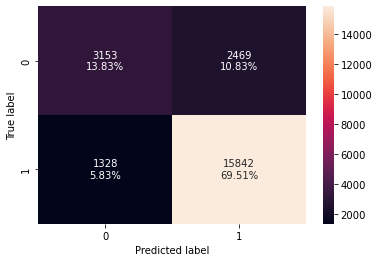

<IPython.core.display.Javascript object>

In [222]:
# creating confusion matrix
confusion_matrix_statsmodels(lg5, X_train5, y_train)

In [223]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg5, X_train5, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.833406,0.922656,0.865163,0.892985


<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set

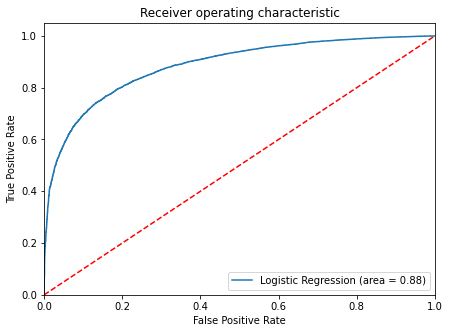

<IPython.core.display.Javascript object>

In [225]:
logit_roc_auc_train = roc_auc_score(y_train, lg5.predict(X_train5))
fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(X_train5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [227]:
thresholds

array([1.99988481, 0.99988481, 0.99942801, ..., 0.02797643, 0.02636834,
       0.02280037])

<IPython.core.display.Javascript object>

In [228]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(X_train5))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.7626517771565007


<IPython.core.display.Javascript object>

#### Checking model performance on training set

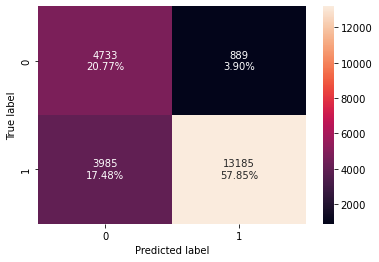

<IPython.core.display.Javascript object>

In [229]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg5, X_train5, y_train, threshold=optimal_threshold_auc_roc
)

In [230]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg5, X_train5, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.786153,0.767909,0.936834,0.844002


<IPython.core.display.Javascript object>

* Precision of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

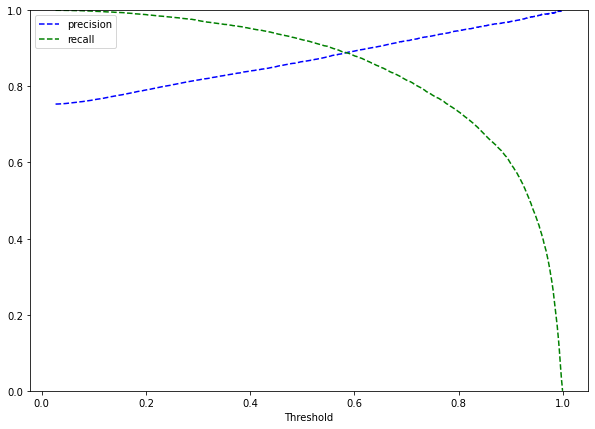

<IPython.core.display.Javascript object>

In [231]:
y_scores = lg5.predict(X_train5)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.58, we get balanced recall and precision.

In [232]:
# setting the threshold
optimal_threshold_curve = 0.58

<IPython.core.display.Javascript object>

#### Checking model performance on training set

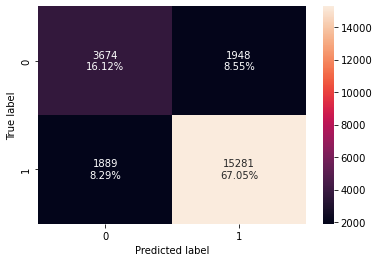

<IPython.core.display.Javascript object>

In [233]:
# creating confusion matrix
confusion_matrix_statsmodels(lg5, X_train5, y_train, threshold=optimal_threshold_curve)

In [234]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg5, X_train5, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.831651,0.889983,0.886935,0.888456


<IPython.core.display.Javascript object>

* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

### Model Performance Summary

In [235]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.833406,0.786153,0.831651
Recall,0.922656,0.767909,0.889983
Precision,0.865163,0.936834,0.886935
F1,0.892985,0.844002,0.888456


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [237]:
X_train5.columns

Index(['const', 'age', 'fnlwgt', 'working_hours_per_week',
       'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_Unknown', 'education_ 12th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Prof-school',
       'education_ Some-college', 'marital_status_never_married',
       'marital_status_not_married', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'native_country_europe',
       'native_country_north_america', 'native_country_south_america'],
      dtype='object')

<IPython.core.display.Javascript object>

In [236]:
X_test5 = X_test[list(X_train5.columns)]

KeyError: "['workclass_Unknown'] not in index"

<IPython.core.display.Javascript object>

**Using model with default threshold**

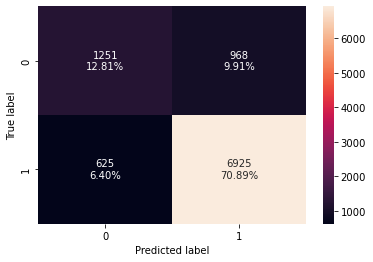

<IPython.core.display.Javascript object>

In [101]:
# creating confusion matrix
confusion_matrix_statsmodels(lg5, X_test5, y_test)

In [102]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg5, X_test5, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.836933,0.917219,0.87736,0.896846


<IPython.core.display.Javascript object>

* ROC curve on test set

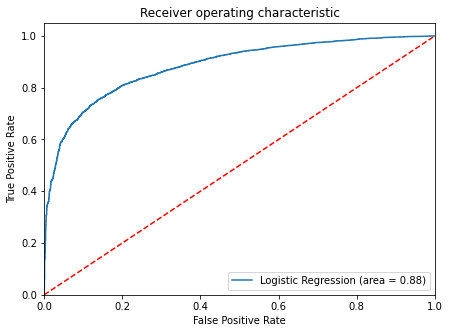

<IPython.core.display.Javascript object>

In [103]:
logit_roc_auc_train = roc_auc_score(y_test, lg5.predict(X_test5))
fpr, tpr, thresholds = roc_curve(y_test, lg5.predict(X_test5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.76** 

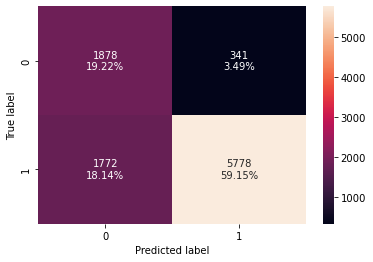

<IPython.core.display.Javascript object>

In [104]:
# creating confusion matrix
confusion_matrix_statsmodels(lg5, X_test5, y_test, threshold=optimal_threshold_auc_roc)

In [105]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg5, X_test5, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.783704,0.765298,0.944272,0.845417


<IPython.core.display.Javascript object>

**Using model with threshold = 0.58**

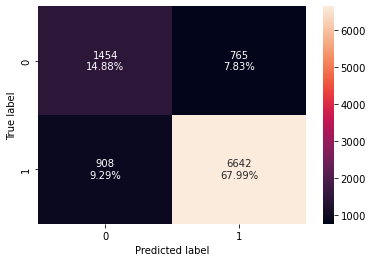

<IPython.core.display.Javascript object>

In [106]:
# creating confusion matrix
confusion_matrix_statsmodels(lg5, X_test5, y_test, threshold=optimal_threshold_curve)

In [107]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg5, X_test5, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.828744,0.879735,0.896719,0.888146


<IPython.core.display.Javascript object>

### Model performance summary

In [108]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.833406,0.786153,0.831651
Recall,0.922656,0.767909,0.889983
Precision,0.865163,0.936834,0.886935
F1,0.892985,0.844002,0.888456


<IPython.core.display.Javascript object>

In [109]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.836933,0.783704,0.828744
Recall,0.917219,0.765298,0.879735
Precision,0.877360,0.944272,0.896719
F1,0.896846,0.845417,0.888146


<IPython.core.display.Javascript object>

### Conclusion
* We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.89 on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary. 

* Coefficient of age,fnlwgt,marital_status, working_hours_per_week,some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

### Recommendations

- The government should promote education among citizens, they should make policies to make education accessible to all, as we say in our analysis that people who have higher education are more likely to have a salary above 50,000 Dollars. 
- Working hours is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.
- People who invest more are more likely to have a salary above 50k, government should initiate investment schemes and facilitate ease of investment so that people can plan and invest in resources.
- As we saw in our analysis that Asian-Pac-Islander and White people are paid more than other races, there should be reforms to ensure that the salary criterion of employees is independent of their race.
- Reforms should be made for private-sector employees so that they are paid fairly for their work.
- Policy formulated by the government should be considerate of equal pay and counter the pay gap that exists in society.

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression


data = who.copy()

data.columns = [
    col.replace(" ", "_").replace("-", "_").replace(".", "") for col in data.columns
]

X = data.drop(["salary", "capital_gain", "capital_loss"], axis=1)
Y = data["salary"].replace(" <=50K", 1).replace(" >50K", 0)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)


def fix_strings(df_of_strings):
    fixed = df_of_strings.copy()
    for col in df_of_strings:
        fixed[col] = (
            fixed[col].str.strip().str.replace("?", "Unknown").str.replace("-", "_")
        )
    return fixed


def fix_marital_status(marital_status_df):
    """Only used on:  marital_status"""
    married_mapper = {
        "Never-married": "never_married",
        "Married-civ-spouse": "married",
        "Married-AF-spouse": "married",
        "Divorced": "not_married",
        "Separated": "not_married",
        "Widowed": "not_married",
        "Married-spouse-absent": "not_married",
    }
    fixed = marital_status_df.copy()
    fixed["marital_status"] = (
        fixed["marital_status"].str.replace(" ", "").map(married_mapper)
    )
    return fixed


def convert_country_to_continent(df_of_countries):
    """
    Only used on: native_country
    """
    north_america = [
        "Canada",
        "Cuba",
        "Dominican-Republic",
        "El-Salvador",
        "Guatemala",
        "Haiti",
        "Honduras",
        "Jamaica",
        "Mexico",
        "Nicaragua",
        "Outlying-US(Guam-USVI-etc)",
        "Puerto-Rico",
        "Trinadad&Tobago",
        "United-States",
    ]
    asia = [
        "Cambodia",
        "China",
        "Hong",
        "India",
        "Iran",
        "Japan",
        "Laos",
        "Philippines",
        "Taiwan",
        "Thailand",
        "Vietnam",
    ]
    south_america = ["Columbia", "Ecuador", "Peru"]

    europe = [
        "England",
        "France",
        "Germany",
        "Greece",
        "Holand-Netherlands",
        "Hungary",
        "Ireland",
        "Italy",
        "Poland",
        "Portugal",
        "Scotland",
        "Yugoslavia",
    ]
    other = ["South", "Unknown"]

    country_mapper = {}

    for c in north_america:
        country_mapper[c] = "north_america"
    for c in asia:
        country_mapper[c] = "asia"
    for c in south_america:
        country_mapper[c] = "south_america"
    for c in europe:
        country_mapper[c] = "eupope"
    for c in other:
        country_mapper[c] = "other"

    fixed = df_of_countries.copy()
    fixed["native_country"] = (
        fixed["native_country"].str.replace(" ", "").map(country_mapper)
    )
    return fixed


num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
all_cols = num_cols + cat_cols


## This process must not include any repeats among the column labels
## (third part of the tuple inside of "preprocess -> ColumnTransformer" below).
## For this reason, I had to create individual pipelines for
## marital, country, and then "other_str" columns

# do some stuff to only the marital column
marital_preprocess = Pipeline(
    [
        ("fix_strings", FunctionTransformer(fix_strings)),
        ("fix_married", FunctionTransformer(fix_marital_status)),
        ("one_hot", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

# do some stuff to only the country column
country_preprocess = Pipeline(
    [
        ("fix_strings", FunctionTransformer(fix_strings)),
        ("fix_country", FunctionTransformer(convert_country_to_continent)),
        ("one_hot", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

# do some different (simpler) stuff to the remaining string columns
other_str_preprocess = Pipeline(
    [
        ("fix_strings", FunctionTransformer(fix_strings)),
        ("one_hot", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("scale", RobustScaler(), num_cols),
        ("fix_married", marital_preprocess, ["marital_status"]),
        ("fix_country", country_preprocess, ["native_country"]),
        (
            "other_str",
            other_str_preprocess,
            [c for c in cat_cols if c not in ["marital_status", "native_country"]],
        ),
    ]
)

# model (later, this can be changed to other classifier models to "compete" for the highest score)
model = LogisticRegression()

# the full model pipeline, that protects from data leakage
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train)

0.8143208143208143

<IPython.core.display.Javascript object>

In [299]:
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)


def show_metrics(true_labels, pred_labels):
    results = {
        "accuracy": accuracy_score(true_labels, pred_labels),
        "recall": recall_score(true_labels, pred_labels),
        "precision": precision_score(true_labels, pred_labels),
        "f1_score": f1_score(true_labels, pred_labels),
    }
    return display(pd.DataFrame([results]))


print("TRAIN")
show_metrics(y_train, train_preds)
print("\nTEST")
show_metrics(y_test, test_preds)

TRAIN


,accuracy,recall,precision,f1_score
0,0.814321,0.9265,0.842674,0.882601



TEST


,accuracy,recall,precision,f1_score
0,0.823728,0.926093,0.857283,0.89036


<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'Predicted label')

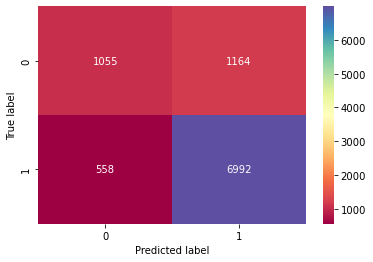

<IPython.core.display.Javascript object>

In [314]:
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(
    cm, annot=True, fmt="", cmap="Spectral",
)
plt.ylabel("True label")
plt.xlabel("Predicted label")